In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import os

#Algorithms
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#### Variables with short description

<b>id</b>:	                    Unique ID for every Customer

<b>account_type</b>: 	        Account Type – current or saving

<b>gender</b>:      	        Gender of customer

<b>age</b>:         	        Age of customer

<b>region_code</b>: 	        Code assigned to region of residence (has order)

<b>cc_cons_apr</b>: 	        Credit card spend in April

<b>dc_cons_apr</b>:    	        Debit card spend in April

<b>cc_cons_may</b>: 	        Credit card spend in May

<b>dc_cons_may</b>: 	        Debit card spend in May

<b>cc_cons_jun</b>: 	        Credit card spend in June

<b>dc_cons_jun</b>: 	        Debit card spend in June

<b>cc_count_apr</b>:	        Number of credit card transactions in April

<b>cc_count_may</b>:	        Number of credit card transactions in May

<b>cc_count_jun</b>: 	        Number of credit card transactions in June

<b>dc_count_apr</b>:	        Number of debit card transactions in April

<b>dc_count_may</b>:	        Number of debit card transactions in May

<b>dc_count_jun</b>:	        Number of debit card transactions in June

<b>card_lim</b>:    	        Maximum Credit Card Limit allocated

<b>personal_loan_active</b>:	Active personal loan with other bank

<b>vehicle_loan_active</b>: 	Active Vehicle loan with other bank

<b>personal_loan_closed</b>:	Closed personal loan in last 12 months

<b>vehicle_loan_closed</b>: 	Closed vehicle loan in last 12 months

<b>investment_1</b>:        	DEMAT investment in june

<b>investment_2</b>:        	fixed deposit investment in june

<b>investment_3</b>:        	Life Insurance investment in June

<b>investment_4</b>:        	General Insurance Investment in June

<b>debit_amount_apr</b>:    	Total amount debited for April

<b>credit_amount_apr</b>:   	Total amount credited for April

<b>debit_count_apr</b>:     	Total number of times amount debited in april

<b>credit_count_apr</b>:    	Total number of times amount credited in april

<b>max_credit_amount_apr</b>:	Maximum amount credited in April

<b>debit_amount_may</b>:    	Total amount debited for May

<b>credit_amount_may</b>:   	Total amount credited for May

<b>credit_count_may</b>:    	Total number of times amount credited in May

<b>debit_count_may</b>:     	Total number of times amount debited in May

<b>max_credit_amount_may</b>:  	Maximum amount credited in May

<b>debit_amount_jun</b>:    	Total amount debited for June

<b>credit_amount_jun</b>:   	Total amount credited for June

<b>credit_count_jun</b>:    	Total number of times amount credited in June

<b>debit_count_jun</b>:     	Total number of times amount debited in June

<b>max_credit_amount_jun</b>:	Maximum amount credited in June

<b>loan_enq</b>:             	Loan enquiry in last 3 months

<b>emi_active</b>:          	Monthly EMI paid to other bank for active loans

<b>cc_cons</b>:             	(Target) Average Credit Card Spend in next three months

In [2]:
os.chdir("D:\\Data Science\\Amex Hackathon\\train")
train = pd.read_csv('train.csv', na_values = [' '], keep_default_na = True, na_filter = True)

In [3]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [4]:
train.shape

(32820, 44)

In [5]:
os.chdir("D:\\Data Science\\Amex Hackathon")
test = pd.read_csv('test.csv', na_values = [' '], keep_default_na = True, na_filter = True)

In [6]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,6975,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,43223,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,45502,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,...,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,12368,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,...,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,40415,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,...,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [7]:
test.shape

(14067, 43)

## Handling missing values

In [8]:
train.isna().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active     30078
vehicle_loan_active      31974
personal_loan_closed     29937
vehicle_loan_closed      31195
investment_1             31394
investment_2             30482
investment_3             31488
investment_4             32414
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

In [9]:
train.dtypes

id                         int64
account_type              object
gender                    object
age                        int64
region_code                int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may             float64
cc_count_jun             float64
dc_count_apr             float64
dc_count_may             float64
dc_count_jun             float64
card_lim                 float64
personal_loan_active     float64
vehicle_loan_active      float64
personal_loan_closed     float64
vehicle_loan_closed      float64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr         float64
max_credit

In [10]:
train.shape

(32820, 44)

Total no. of rows = 32,820. So, we can <b>drop columns</b> that contains more than 30,000 na values

In [11]:
train.drop(['dc_cons_apr','dc_cons_may','dc_cons_jun', 'dc_count_apr','dc_count_may','dc_cons_apr', 'dc_cons_may','dc_cons_jun', 'dc_count_jun', 'personal_loan_active','vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq'], axis = 1, inplace = True)

In [12]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,479.00,622.0,2.0,1.0,...,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,20329,current,M,33,326,52702.00,29873.00,1087.0,11.0,14.0,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,17679,current,M,44,264,10800.49,21659.64,1168.0,6.0,9.0,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,16428,saving,M,44,233,20936.00,2094.00,11778.5,9.0,6.0,...,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,18721,saving,F,35,324,1183.83,3656.29,945.0,2.0,7.0,...,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814


In [13]:
train.fillna(train.mean(), inplace = True)

In [14]:
train.isna().sum()

id                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
cc_cons_may              0
cc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
cc_cons                  0
dtype: int64

### Now let's follow above steps for test dataset

In [15]:
test.shape

(14067, 43)

In [16]:
test.isna().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr               8230
cc_cons_may                  0
dc_cons_may               7375
cc_cons_jun                  0
dc_cons_jun               9064
cc_count_apr              1038
cc_count_may               542
cc_count_jun               634
dc_count_apr              8230
dc_count_may              7375
dc_count_jun              6552
card_lim                     3
personal_loan_active     12933
vehicle_loan_active      13712
personal_loan_closed     12808
vehicle_loan_closed      13386
investment_1             13417
investment_2             13040
investment_3             13453
investment_4             13894
debit_amount_apr           847
credit_amount_apr         1465
debit_count_apr            788
credit_count_apr           788
max_credit_amount_apr     1465
debit_amount_may          1001
credit_a

In [17]:
test.drop(['dc_cons_apr','dc_cons_may','dc_cons_jun', 'dc_count_apr','dc_count_may','dc_cons_apr', 'dc_cons_may','dc_cons_jun', 'dc_count_jun','personal_loan_active','vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'loan_enq'], axis = 1, inplace = True)

In [18]:
test.fillna(test.mean(), inplace = True)

In [19]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active
0,6975,saving,M,36,447,17942.70,1656.00,4551.00,6.0,2.0,...,15416.520000,3.000000,7.000000,10000.000000,17316.44000,5154.000000,2.000000,8.000000,5000.000000,0.00
1,43223,current,M,31,233,44870.36,34177.00,25889.21,13.0,19.0,...,77598.987697,4.133789,13.969704,48388.190527,72342.31325,71200.599636,5.836863,15.963689,42305.241682,0.00
2,45502,current,M,26,823,1073.00,4141.00,6740.29,3.0,5.0,...,65227.000000,4.000000,22.000000,26926.000000,33981.00000,37762.000000,3.000000,15.000000,29352.000000,2885.82
3,12368,current,M,39,878,33060.58,3797.12,291.00,16.0,12.0,...,63393.000000,4.000000,8.000000,57185.000000,52927.00000,89425.000000,7.000000,11.000000,32696.000000,0.00
4,40415,current,M,44,404,18236.90,30513.30,20395.28,42.0,38.0,...,45120.000000,1.000000,5.000000,45000.000000,31656.69000,34275.000000,3.000000,4.000000,19000.000000,3342.58


In [20]:
test.isna().sum()

id                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
cc_cons_may              0
cc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
card_lim                 0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
emi_active               0
dtype: int64

In [21]:
print('train.shape: ', train.shape)
print('test.shape: ', test.shape)

train.shape:  (32820, 29)
test.shape:  (14067, 28)


# EDA: Plotting

### Creating new variables for plotting

Creating 4 new columns for <b>total credit card spend of 3 months</b>, <b>total debit card spend of 3 months</b>, <b>total credit amount for 3 months</b> and <b>total debit amount for 3 months</b>

In [22]:
train['total_credit_spend_3months'] = train['cc_cons_apr'] + train['cc_cons_may'] + train['cc_cons_jun'] 

In [23]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,total_credit_spend_3months
0,23334,saving,M,63,305,7695.00,479.00,622.0,2.0,1.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435,8796.00
1,20329,current,M,33,326,52702.00,29873.00,1087.0,11.0,14.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921,83662.00
2,17679,current,M,44,264,10800.49,21659.64,1168.0,6.0,9.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970,33628.13
3,16428,saving,M,44,233,20936.00,2094.00,11778.5,9.0,6.0,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579,34808.50
4,18721,saving,F,35,324,1183.83,3656.29,945.0,2.0,7.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814,5785.12


Creating similar parameters for <b>credit amounts</b> and also <b>counts</b>

In [24]:
train['total_credit_amount_3months'] = train['credit_amount_apr'] + train['credit_amount_may'] + train['credit_amount_jun'] 

In [25]:
train['total_credit_count_3months'] = train['credit_count_apr'] + train['credit_count_may'] + train['credit_count_jun'] 

In [26]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,total_credit_spend_3months,total_credit_amount_3months,total_credit_count_3months
0,23334,saving,M,63,305,7695.00,479.00,622.0,2.0,1.0,...,20215.85,1279.37,7.0,3.0,470.0,0.00,435,8796.00,165790.37,11.0
1,20329,current,M,33,326,52702.00,29873.00,1087.0,11.0,14.0,...,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921,83662.00,399808.00,23.0
2,17679,current,M,44,264,10800.49,21659.64,1168.0,6.0,9.0,...,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970,33628.13,91290.91,12.0
3,16428,saving,M,44,233,20936.00,2094.00,11778.5,9.0,6.0,...,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579,34808.50,29367.00,5.0
4,18721,saving,F,35,324,1183.83,3656.29,945.0,2.0,7.0,...,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814,5785.12,66948.00,7.0


<b>Data Analysis

Let's find the std dev of these parameters

In [27]:
train['std_dev_credit_spend'] = train.apply(lambda x: np.std([x['cc_cons_apr'], x['cc_cons_may'], x['cc_cons_jun']]), axis = 1)

In [28]:
train['std_dev_credit_spend'].head()

0     3368.455531
1    21118.462860
2     8370.671765
3     7693.217146
4     1225.705769
Name: std_dev_credit_spend, dtype: float64

In [29]:
train['std_dev_credit_amount'] = train.apply(lambda x: np.std([x['credit_amount_apr'], x['credit_amount_may'], x['credit_amount_jun']]), axis = 1) 

In [30]:
train['std_dev_credit_count'] = train.apply(lambda x: np.std([x['credit_count_apr'], x['credit_count_may'], x['credit_count_jun']]), axis = 1)  

In [31]:
train.head()

,id,account_type,gender,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,...,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,total_credit_spend_3months,total_credit_amount_3months,total_credit_count_3months,std_dev_credit_spend,std_dev_credit_amount,std_dev_credit_count
0,23334,saving,M,63,305,7695.00,479.00,622.0,2.0,1.0,...,3.0,470.0,0.00,435,8796.00,165790.37,11.0,3368.455531,46256.438991,2.494438
1,20329,current,M,33,326,52702.00,29873.00,1087.0,11.0,14.0,...,19.0,27000.0,4963.33,1921,83662.00,399808.00,23.0,21118.462860,55103.771978,1.247219
2,17679,current,M,44,264,10800.49,21659.64,1168.0,6.0,9.0,...,19.0,20800.0,0.00,1970,33628.13,91290.91,12.0,8370.671765,6536.701831,1.632993
3,16428,saving,M,44,233,20936.00,2094.00,11778.5,9.0,6.0,...,1.0,5300.0,1238.18,21579,34808.50,29367.00,5.0,7693.217146,7213.012547,0.942809
4,18721,saving,F,35,324,1183.83,3656.29,945.0,2.0,7.0,...,4.0,45000.0,0.00,1814,5785.12,66948.00,7.0,1225.705769,22226.971589,1.247219


<b>Let's do the same for test data

In [32]:
test['std_dev_credit_spend'] = test.apply(lambda x: np.std([x['cc_cons_apr'], x['cc_cons_may'], x['cc_cons_jun']]), axis = 1)

In [33]:
test['std_dev_credit_amount'] = test.apply(lambda x: np.std([x['credit_amount_apr'], x['credit_amount_may'], x['credit_amount_jun']]), axis = 1) 

In [34]:
test['std_dev_credit_count'] = test.apply(lambda x: np.std([x['credit_count_apr'], x['credit_count_may'], x['credit_count_jun']]), axis = 1)  

In [35]:
test.head()

,id,account_type,gender,age,region_code,cc_cons_apr,cc_cons_may,cc_cons_jun,cc_count_apr,cc_count_may,...,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,std_dev_credit_spend,std_dev_credit_amount,std_dev_credit_count
0,6975,saving,M,36,447,17942.70,1656.00,4551.00,6.0,2.0,...,10000.000000,17316.44000,5154.000000,2.000000,8.000000,5000.000000,0.00,7094.405079,8216.537886,0.471405
1,43223,current,M,31,233,44870.36,34177.00,25889.21,13.0,19.0,...,48388.190527,72342.31325,71200.599636,5.836863,15.963689,42305.241682,0.00,7769.738066,2618.495026,0.885002
2,45502,current,M,26,823,1073.00,4141.00,6740.29,3.0,5.0,...,26926.000000,33981.00000,37762.000000,3.000000,15.000000,29352.000000,2885.82,2316.297535,27953.310720,0.816497
3,12368,current,M,39,878,33060.58,3797.12,291.00,16.0,12.0,...,57185.000000,52927.00000,89425.000000,7.000000,11.000000,32696.000000,0.00,14691.223162,13245.109194,1.247219
4,40415,current,M,44,404,18236.90,30513.30,20395.28,42.0,38.0,...,45000.000000,31656.69000,34275.000000,3.000000,4.000000,19000.000000,3342.58,5351.458056,8161.207849,0.942809


### Age v/s avg. credit spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


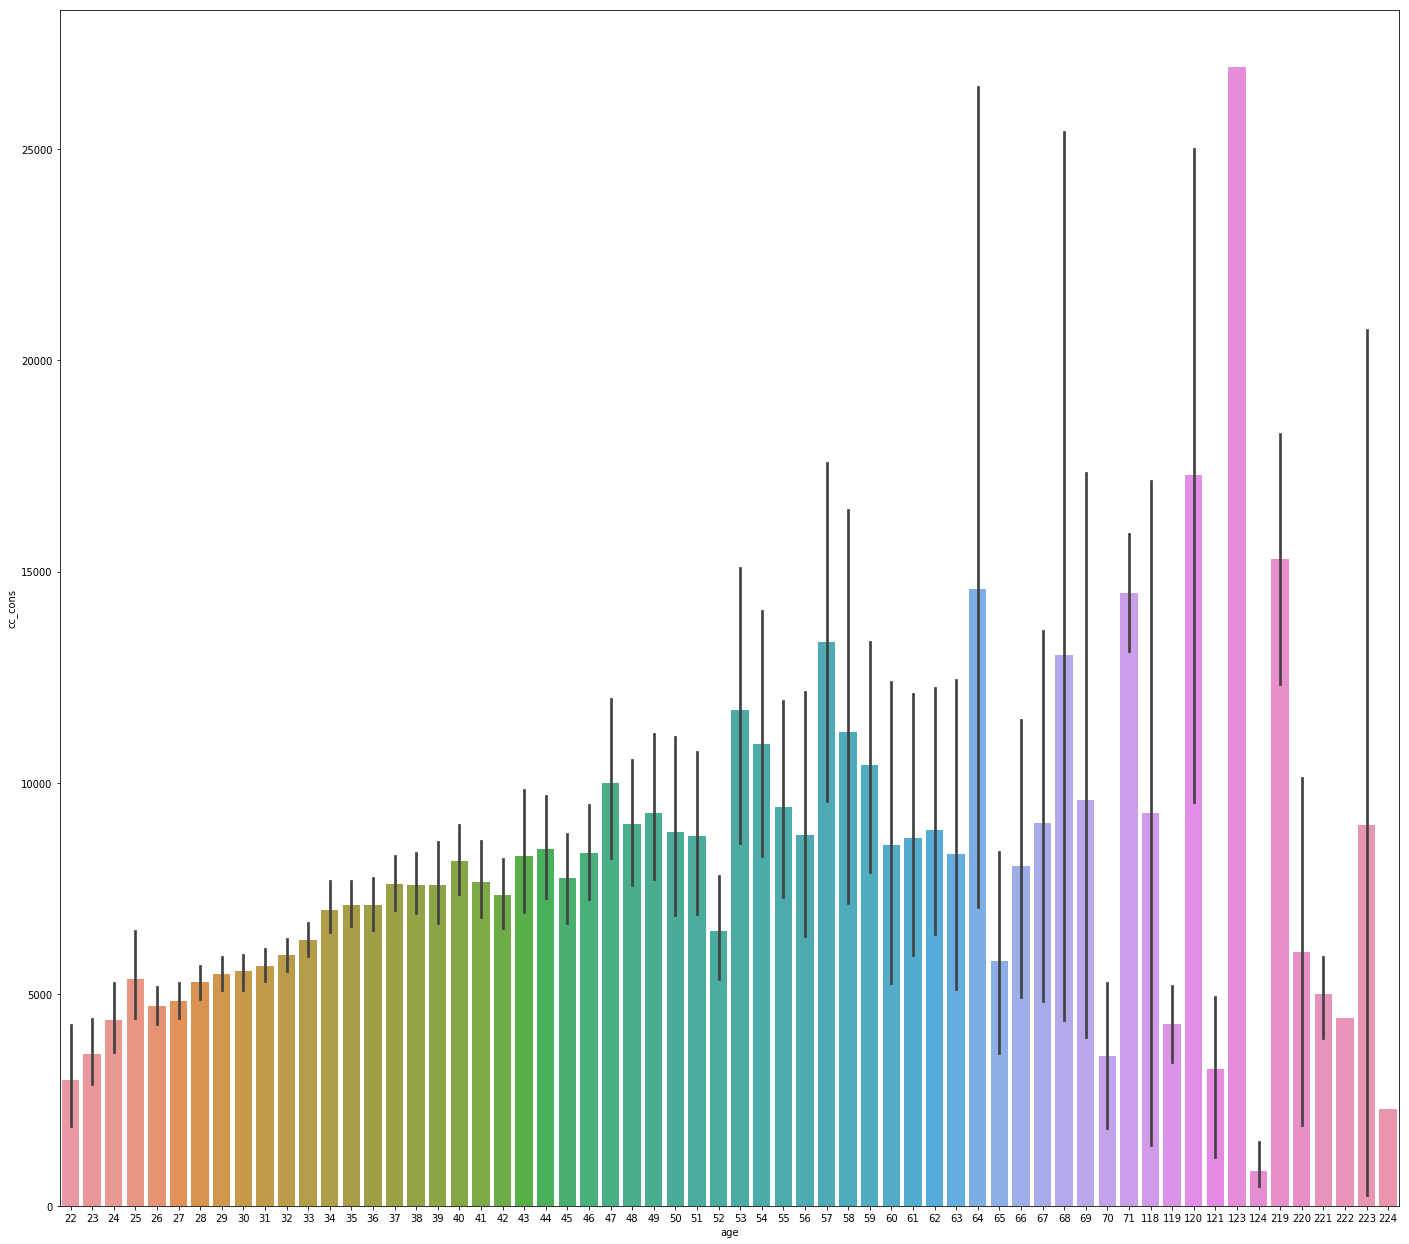

In [36]:
fig, ax = plt.subplots(figsize = (24, 22))
sns.barplot('age','cc_cons', data = train, ax = ax)

Since, there is <b>tremendous variation</b> in <b>avg credit card spend</b> due to <b>age</b>. Hence, age becomes an important parameter for modelling

### Account type v/s avg. credit spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


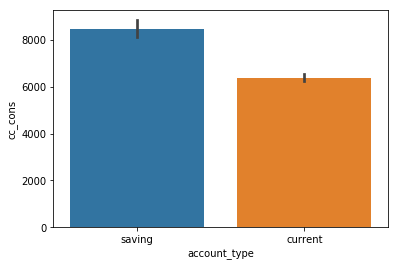

In [37]:
sns.barplot('account_type','cc_cons', data = train)

Let's do a scatter plot of <b>total credit spend </b> and <b>total debit spend</b> for last 3 months with avg credit spend in next 3 months

### Credit spend for last 3 months v/s avg. credit spend of next 3 months

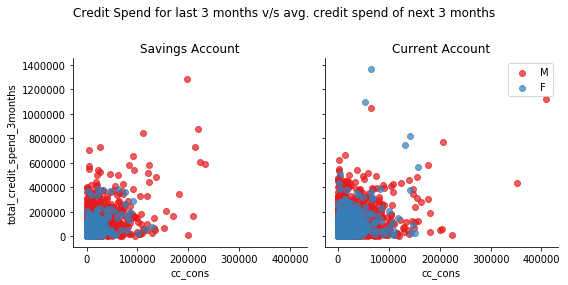

In [38]:
g = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g.map(plt.scatter, 'cc_cons', 'total_credit_spend_3months', alpha = 0.7)

g.axes[-1].legend()

plt.subplots_adjust(top = 0.8)
g.fig.suptitle('Credit Spend for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

plt.show()

### Debit Spend for last 3 months v/s avg. credit spend of next 3 months

In [39]:
"""g1 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g1.map(plt.scatter, 'cc_cons', 'total_debit_spend_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g1.fig.suptitle('Debit Spend for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g1.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g1.axes[-1].legend()
plt.show() """

'g1 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)\ng1.map(plt.scatter, \'cc_cons\', \'total_debit_spend_3months\', alpha = 0.7)\n\nplt.subplots_adjust(top = 0.8)\ng1.fig.suptitle(\'Debit Spend for last 3 months v/s avg. credit spend of next 3 months\')\n\n#Change Titles\naxes = g1.axes.flatten()\naxes[0].set_title("Savings Account")\naxes[1].set_title("Current Account")\n\ng1.axes[-1].legend()\nplt.show() '

Scatter plots show relationship b/w the parameters hence they become important for modeling

### Plotting for credit amounts v/s avg. credit spend for next three months

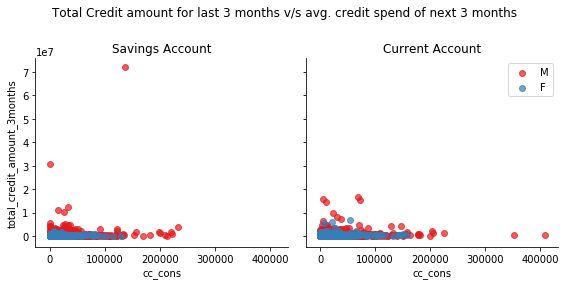

In [40]:
g2 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g2.map(plt.scatter, 'cc_cons', 'total_credit_amount_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g2.fig.suptitle('Total Credit amount for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g2.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g2.axes[-1].legend()
plt.show()

Total credit amount v/s cc_cons show a non-linear relationship. 

### Plotting for credit counts v/s avg. credit spend for next three months

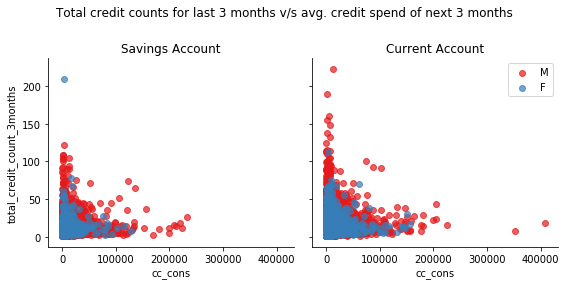

In [41]:
g4 = sns.FacetGrid(train, col="account_type", hue = "gender", palette="Set1", col_wrap=2, size = 4)
g4.map(plt.scatter, 'cc_cons', 'total_credit_count_3months', alpha = 0.7)

plt.subplots_adjust(top = 0.8)
g4.fig.suptitle('Total credit counts for last 3 months v/s avg. credit spend of next 3 months')

#Change Titles
axes = g4.axes.flatten()
axes[0].set_title("Savings Account")
axes[1].set_title("Current Account")

g4.axes[-1].legend()
plt.show()

A <b>linear relationship</b> can be observed b/w the parameters: total credit count v/s avg. spend for next 3 months

### Plotting card limit v/s avg. spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


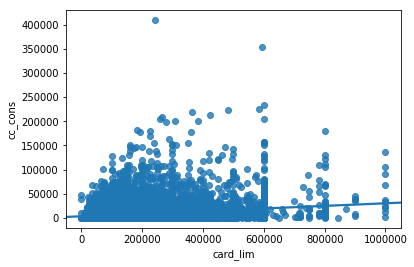

In [42]:
sns.regplot(x = 'card_lim', y = 'cc_cons', data = train)

In [43]:
train[["card_lim", "cc_cons"]].corr()

,card_lim,cc_cons
card_lim,1.000000,0.265348
cc_cons,0.265348,1.000000


### Plotting emi active v/s avg. spend for next 3 months

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


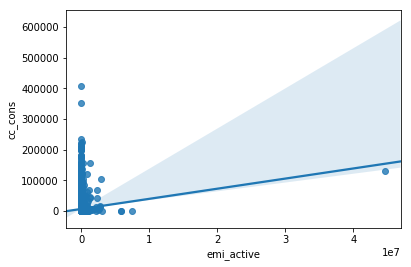

In [44]:
sns.regplot(x = 'emi_active', y = 'cc_cons', data = train)

In [45]:
train[["emi_active", "cc_cons"]].corr()

,emi_active,cc_cons
emi_active,1.00000,0.06934
cc_cons,0.06934,1.00000


# Modeling

### Preparing train and test data

<b>Let's merge train and test

In [46]:
data = pd.concat([train, test], ignore_index=True)

In [47]:
data.head()

,account_type,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,...,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,region_code,std_dev_credit_amount,std_dev_credit_count,std_dev_credit_spend,total_credit_amount_3months,total_credit_count_3months,total_credit_spend_3months
0,saving,63,150000.0,435.0,7695.00,622.0,479.00,2.0,3.0,1.0,...,50000.0,470.0,45000.0,305,46256.438991,2.494438,3368.455531,165790.37,11.0,8796.00
1,current,33,176000.0,1921.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,...,70000.0,27000.0,150000.0,326,55103.771978,1.247219,21118.462860,399808.00,23.0,83662.00
2,current,44,65000.0,1970.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,...,11700.0,20800.0,13800.0,264,6536.701831,1.632993,8370.671765,91290.91,12.0,33628.13
3,saving,44,600000.0,21579.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,...,2000.0,5300.0,19300.0,233,7213.012547,0.942809,7693.217146,29367.00,5.0,34808.50
4,saving,35,100000.0,1814.0,1183.83,945.0,3656.29,2.0,9.0,7.0,...,10000.0,45000.0,3000.0,324,22226.971589,1.247219,1225.705769,66948.00,7.0,5785.12


In [48]:
data.columns

Index(['account_type', 'age', 'card_lim', 'cc_cons', 'cc_cons_apr',
       'cc_cons_jun', 'cc_cons_may', 'cc_count_apr', 'cc_count_jun',
       'cc_count_may', 'credit_amount_apr', 'credit_amount_jun',
       'credit_amount_may', 'credit_count_apr', 'credit_count_jun',
       'credit_count_may', 'debit_amount_apr', 'debit_amount_jun',
       'debit_amount_may', 'debit_count_apr', 'debit_count_jun',
       'debit_count_may', 'emi_active', 'gender', 'id',
       'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'region_code', 'std_dev_credit_amount',
       'std_dev_credit_count', 'std_dev_credit_spend',
       'total_credit_amount_3months', 'total_credit_count_3months',
       'total_credit_spend_3months'],
      dtype='object')

#### Let's convert all categorical variable to numerical using ONE HOT ENCODING

In [49]:
data_onehot = data[['gender','account_type']]

In [50]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False)

In [51]:
enc.fit(data_onehot)

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False)

In [52]:
data_onehot_transformed = enc.transform(data_onehot)

Converting the returned array into a DF

In [53]:
data2 = pd.DataFrame(data_onehot_transformed, columns = ['Male', 'Female', 'Savings_account','Current_account'])

In [54]:
data2.head()

,Male,Female,Savings_account,Current_account
0,0.0,1.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0


In [55]:
data = pd.concat([data, data2], axis = 1)

In [56]:
data.head()

,account_type,age,card_lim,cc_cons,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,...,std_dev_credit_amount,std_dev_credit_count,std_dev_credit_spend,total_credit_amount_3months,total_credit_count_3months,total_credit_spend_3months,Male,Female,Savings_account,Current_account
0,saving,63,150000.0,435.0,7695.00,622.0,479.00,2.0,3.0,1.0,...,46256.438991,2.494438,3368.455531,165790.37,11.0,8796.00,0.0,1.0,0.0,1.0
1,current,33,176000.0,1921.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,...,55103.771978,1.247219,21118.462860,399808.00,23.0,83662.00,0.0,1.0,1.0,0.0
2,current,44,65000.0,1970.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,...,6536.701831,1.632993,8370.671765,91290.91,12.0,33628.13,0.0,1.0,1.0,0.0
3,saving,44,600000.0,21579.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,...,7213.012547,0.942809,7693.217146,29367.00,5.0,34808.50,0.0,1.0,0.0,1.0
4,saving,35,100000.0,1814.0,1183.83,945.0,3656.29,2.0,9.0,7.0,...,22226.971589,1.247219,1225.705769,66948.00,7.0,5785.12,1.0,0.0,0.0,1.0


In [57]:
data.columns.tolist()

['account_type',
 'age',
 'card_lim',
 'cc_cons',
 'cc_cons_apr',
 'cc_cons_jun',
 'cc_cons_may',
 'cc_count_apr',
 'cc_count_jun',
 'cc_count_may',
 'credit_amount_apr',
 'credit_amount_jun',
 'credit_amount_may',
 'credit_count_apr',
 'credit_count_jun',
 'credit_count_may',
 'debit_amount_apr',
 'debit_amount_jun',
 'debit_amount_may',
 'debit_count_apr',
 'debit_count_jun',
 'debit_count_may',
 'emi_active',
 'gender',
 'id',
 'max_credit_amount_apr',
 'max_credit_amount_jun',
 'max_credit_amount_may',
 'region_code',
 'std_dev_credit_amount',
 'std_dev_credit_count',
 'std_dev_credit_spend',
 'total_credit_amount_3months',
 'total_credit_count_3months',
 'total_credit_spend_3months',
 'Male',
 'Female',
 'Savings_account',
 'Current_account']

Let's drop unrequired columns

In [58]:
data.drop(['gender','account_type'], axis = 1, inplace = True)

In [59]:
data.columns

Index(['age', 'card_lim', 'cc_cons', 'cc_cons_apr', 'cc_cons_jun',
       'cc_cons_may', 'cc_count_apr', 'cc_count_jun', 'cc_count_may',
       'credit_amount_apr', 'credit_amount_jun', 'credit_amount_may',
       'credit_count_apr', 'credit_count_jun', 'credit_count_may',
       'debit_amount_apr', 'debit_amount_jun', 'debit_amount_may',
       'debit_count_apr', 'debit_count_jun', 'debit_count_may', 'emi_active',
       'id', 'max_credit_amount_apr', 'max_credit_amount_jun',
       'max_credit_amount_may', 'region_code', 'std_dev_credit_amount',
       'std_dev_credit_count', 'std_dev_credit_spend',
       'total_credit_amount_3months', 'total_credit_count_3months',
       'total_credit_spend_3months', 'Male', 'Female', 'Savings_account',
       'Current_account'],
      dtype='object')

<b>Features Selection

In [60]:
y = data['cc_cons']
y.head()

0      435.0
1     1921.0
2     1970.0
3    21579.0
4     1814.0
Name: cc_cons, dtype: float64

In [61]:
#'total_debit_amount_3months', 'total_debit_count_3months', 'total_debit_spend_3months', 'std_dev_debit_amount', 'std_dev_debit_count', 'std_dev_debit_spend', 'std_dev_credit_amount', 'std_dev_credit_count', 'std_dev_credit_spend'

In [62]:
Feature2 = data.drop(['cc_cons','region_code','total_credit_amount_3months', 'total_credit_count_3months', 'total_credit_spend_3months'], axis = 1)

In [63]:
X = Feature2

In [64]:
X.head()

,age,card_lim,cc_cons_apr,cc_cons_jun,cc_cons_may,cc_count_apr,cc_count_jun,cc_count_may,credit_amount_apr,credit_amount_jun,...,max_credit_amount_apr,max_credit_amount_jun,max_credit_amount_may,std_dev_credit_amount,std_dev_credit_count,std_dev_credit_spend,Male,Female,Savings_account,Current_account
0,63,150000.0,7695.00,622.0,479.00,2.0,3.0,1.0,50259.0,1279.37,...,50000.0,470.0,45000.0,46256.438991,2.494438,3368.455531,0.0,1.0,0.0,1.0
1,33,176000.0,52702.00,1087.0,29873.00,11.0,11.0,14.0,169812.0,55390.00,...,70000.0,27000.0,150000.0,55103.771978,1.247219,21118.462860,0.0,1.0,1.0,0.0
2,44,65000.0,10800.49,1168.0,21659.64,6.0,6.0,9.0,38942.0,29297.91,...,11700.0,20800.0,13800.0,6536.701831,1.632993,8370.671765,0.0,1.0,1.0,0.0
3,44,600000.0,20936.00,11778.5,2094.00,9.0,6.0,6.0,2294.0,7544.00,...,2000.0,5300.0,19300.0,7213.012547,0.942809,7693.217146,0.0,1.0,0.0,1.0
4,35,100000.0,1183.83,945.0,3656.29,2.0,9.0,7.0,10271.0,53483.00,...,10000.0,45000.0,3000.0,22226.971589,1.247219,1225.705769,1.0,0.0,0.0,1.0


In [65]:
X.shape

(46887, 32)

### Train-Test split

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 32820, shuffle = False, random_state=4 )

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32820, 32) (32820,)
Test set: (14067, 32) (14067,)


# Modeling

Let's import y_test values

In [68]:
y_given = pd.read_csv('sample_submission.csv', usecols = ['cc_cons'])

In [69]:
y_given.head()

,cc_cons
0,7000
1,7000
2,7000
3,7000
4,7000


In [70]:
y_given.isna().sum() 

cc_cons    0
dtype: int64

In [71]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import make_scorer

# 1. Polynomial Regression

Since, we have multiple features to predict values of "Credit spend in next 3 months", we have to use <b>Polynomial regression

In [72]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree = 2, include_bias = False)), ('linear', LinearRegression(fit_intercept=False))]

In [73]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [74]:
pipe.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [75]:
ypred = pipe.predict(X_test)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [76]:
ypred[0:10]

array([ 4217.70336914, 14807.96313477,  2249.72070312,  5745.65966797,
        7295.68505859,  7077.93188477,  5793.71044922,  4703.82470703,
        9022.53417969,  2734.71154785])

# 2. Ridge Regression

In [77]:
ridge = Ridge(normalize = True)
param_grid = dict(alpha = np.linspace(10,20, 5))
param_grid

{'alpha': array([10. , 12.5, 15. , 17.5, 20. ])}

In [78]:
ridge_regressor = GridSearchCV(ridge, param_grid = param_grid, scoring = make_scorer(mean_squared_log_error), cv = 5)
ridge_regressor

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([10. , 12.5, 15. , 17.5, 20. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_log_error), verbose=0)

In [79]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([10. , 12.5, 15. , 17.5, 20. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_log_error), verbose=0)

In [80]:
yhat = ridge_regressor.predict(X_test)

In [81]:
yhat[0:15]

array([6438.29818232, 7567.38030908, 6176.99776327, 6804.51743217,
       7586.41028026, 6762.9587164 , 6504.56968143, 6418.35381352,
       6895.63065874, 6024.10254281, 6435.2394024 , 8524.17752876,
       7369.28021585, 6641.85126069, 6046.63562135])

In [82]:
min(yhat)

5817.804659249091

In [83]:
print('Best alpha value = ', ridge_regressor.best_params_)
print('Best Root Mean squared Log error = ', ridge_regressor.best_score_)

Best alpha value =  {'alpha': 20.0}
Best Root Mean squared Log error =  2.2644451159609478


In [84]:
print('Best Root Mean squared Log error from Ridge Regression = ', (np.sqrt(ridge_regressor.best_score_)*100))

Best Root Mean squared Log error from Ridge Regression =  150.48073351631922


# 3. Lasso Regression

In [85]:
lasso = Lasso(normalize = True)
param_grid = dict(alpha = np.linspace(10,100, 5))
param_grid

{'alpha': array([ 10. ,  32.5,  55. ,  77.5, 100. ])}

In [86]:
lasso_regressor = GridSearchCV(lasso, param_grid = param_grid, scoring = make_scorer(mean_squared_log_error), cv = 5)

In [87]:
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 10. ,  32.5,  55. ,  77.5, 100. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(mean_squared_log_error), verbose=0)

In [88]:
ylas = lasso_regressor.predict(X_test)

In [89]:
min(ylas)

6824.631840341255

In [90]:
print('Best alpha value = ', lasso_regressor.best_params_)
print('Best Root Mean squared Log error = ', lasso_regressor.best_score_)

Best alpha value =  {'alpha': 32.5}
Best Root Mean squared Log error =  2.373307814232322


In [91]:
print('Best Root Mean squared Log error from Lasso Regression = ', (np.sqrt(ridge_regressor.best_score_)*100))

Best Root Mean squared Log error from Lasso Regression =  150.48073351631922


# 4. Decision Tree Regressor

In [92]:
from sklearn.tree import DecisionTreeRegressor

In [93]:
df = DecisionTreeRegressor(criterion = 'mse', max_depth = 20)

In [94]:
df.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [95]:
yhatdf = df.predict(X_test)

In [96]:
a = mean_squared_log_error(y_given, yhatdf)
a

1.0875294596085483

In [97]:
scoredf = (np.sqrt(a))*100

In [98]:
scoredf

104.28468054362293

# Export of Predicted data

Since Lasso and Ridge, both give the same RMSLE, let's export Lasso's predicted values

In [99]:
X_test['cc_cons'] = ylas

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
Output = X_test[['id','cc_cons']].to_csv('final_output.csv')